In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
data = pd.read_csv("car.csv")
print(data.head())
print(data.info())


                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   i

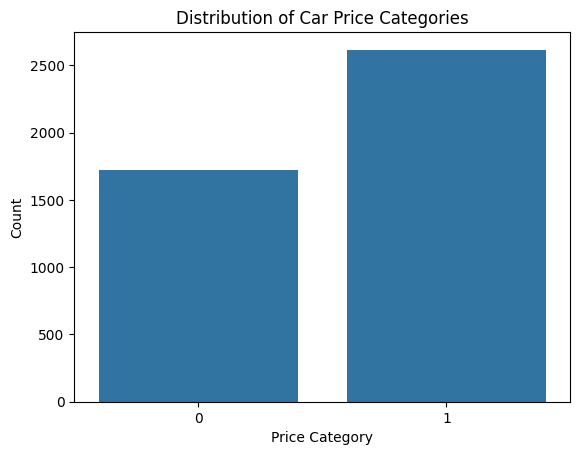

In [12]:
import seaborn as sns

sns.countplot(x=y)
plt.title("Distribution of Car Price Categories")
plt.xlabel("Price Category")
plt.ylabel("Count")
plt.show()


In [4]:
# Drop name (optional)
data = data.drop(['name'], axis=1)

# Create a binary classification target based on price
data['price_category'] = data['selling_price'].apply(lambda x: 'Cheap' if x < 300000 else 'Expensive')

# Drop original selling_price
data = data.drop(['selling_price'], axis=1)

# Encode categorical columns
label_encoders = {}
for column in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

print(data.head())

   year  km_driven  fuel  seller_type  transmission  owner  price_category
0  2007      70000     4            1             1      0               0
1  2007      50000     4            1             1      0               0
2  2012     100000     1            1             1      0               1
3  2017      46000     4            1             1      0               0
4  2014     141000     1            1             1      2               1


In [5]:
X = data.drop('price_category', axis=1)
y = data['price_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [6]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8145161290322581

Confusion Matrix:
 [[234 116]
 [ 45 473]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.67      0.74       350
           1       0.80      0.91      0.85       518

    accuracy                           0.81       868
   macro avg       0.82      0.79      0.80       868
weighted avg       0.82      0.81      0.81       868



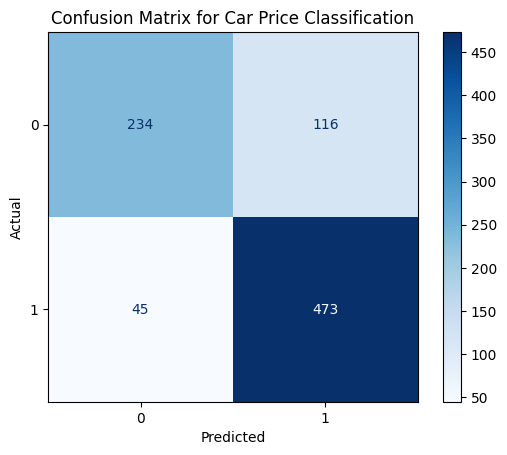

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Car Price Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


NameError: name 'sns' is not defined